In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Loading Dataset and initial data exploration

In [12]:
# Read the data from the image
df = pd.read_excel("C:/Users/Dell/Downloads/customer_churn_large_dataset.xlsx")


In [13]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


## Handling Missing Values

In [14]:
# Find the columns with missing values
missing_columns = df.isna().any()
missing= df.dropna()
print(missing)

       CustomerID             Name  Age  Gender     Location  \
0               1       Customer_1   63    Male  Los Angeles   
1               2       Customer_2   62  Female     New York   
2               3       Customer_3   24  Female  Los Angeles   
3               4       Customer_4   36  Female        Miami   
4               5       Customer_5   46  Female        Miami   
...           ...              ...  ...     ...          ...   
99995       99996   Customer_99996   33    Male      Houston   
99996       99997   Customer_99997   62  Female     New York   
99997       99998   Customer_99998   64    Male      Chicago   
99998       99999   Customer_99999   51  Female     New York   
99999      100000  Customer_100000   27  Female  Los Angeles   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                              17         73.36             236      0  
1                               1         48.76             172      0  
2           

In [15]:
# Checking for duplicate observations

print("There are", sum(df.duplicated()), "duplicates in the dataset")

There are 0 duplicates in the dataset


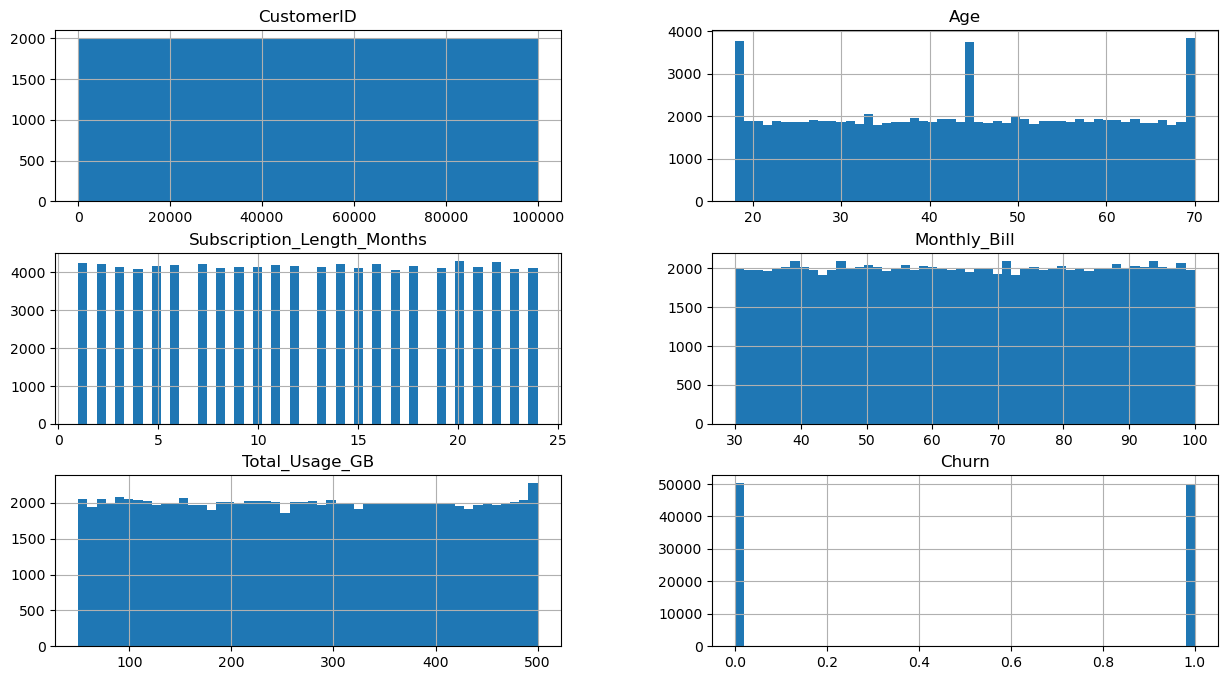

In [16]:
# Looking at the data distributions

df.hist(bins=50, figsize=(15,8))
plt.show()

In [17]:
display(df)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


## Outliers

In [18]:
# Apply the IQR outlier detection method
Q1 = df['Total_Usage_GB'].quantile(0.25)
Q3 = df['Total_Usage_GB'].quantile(0.75)
IQR = Q3 - Q1
df_outliers = df[df['Total_Usage_GB'] < Q1 - 1.5 * IQR]
df_clean = df.drop(df_outliers.index)

In [19]:
display(df_clean)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


## Encoding Categorical Variables 

In [21]:
# Create a label encoder
le = LabelEncoder()

# Encode the categorical variables
for column in df_clean.select_dtypes(include='object'):
    df_clean[column] = le.fit_transform(df_clean[column])

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_clean, df_clean['Churn'], test_size=0.2)


## Feature Engineering 

In [29]:
# Select the features
features = df.select_dtypes(include='int64')

# Apply feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Select the best features
selector = SelectKBest(f_classif, k=5)
selector.fit(scaled_features, df['Churn'])

selected_features = selector.get_support()

# Print the selected features
print(features.columns[selected_features])

Index(['CustomerID', 'Age', 'Subscription_Length_Months', 'Total_Usage_GB',
       'Churn'],
      dtype='object')


## Model's Performance Using Machine Learning Algorithms 

In [30]:
# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Train the random forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Train the neural network model
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='adam')
mlp_classifier.fit(X_train, y_train)

# Evaluate the models
print('Logistic regression accuracy:', log_reg.score(X_test, y_test))
print('Random forest accuracy:', random_forest.score(X_test, y_test))
print('Neural network accuracy:', mlp_classifier.score(X_test, y_test))

Logistic regression accuracy: 0.496
Random forest accuracy: 1.0
Neural network accuracy: 0.99995


## Fine Tuning the Model

In [31]:
# Tune the hyperparameters of the logistic regression model using grid search
params = {'C': [0.1, 1, 10, 100]}
log_reg_cv = GridSearchCV(log_reg, params, cv=5)
log_reg_cv.fit(X_train, y_train)

# Tune the hyperparameters of the random forest model using grid search
params = {'n_estimators': [10, 100, 1000]}
random_forest_cv = GridSearchCV(random_forest, params, cv=5)
random_forest_cv.fit(X_train, y_train)

# Tune the hyperparameters of the neural network model using grid search
params = {'hidden_layer_sizes': [(10, 10, 10), (20, 20, 20)], 'activation': ['relu', 'tanh']}
mlp_classifier_cv = GridSearchCV(mlp_classifier, params, cv=5)
mlp_classifier_cv.fit(X_train, y_train)

# Evaluate the models
print('Logistic regression best parameters:', log_reg_cv.best_params_)
print('Logistic regression best accuracy:', log_reg_cv.best_score_)
print('Random forest best parameters:', random_forest_cv.best_params_)
print('Random forest best accuracy:', random_forest_cv.best_score_)
print('Neural network best parameters:', mlp_classifier_cv.best_params_)
print('Neural network best accuracy:', mlp_classifier_cv.best_score_)

Logistic regression best parameters: {'C': 0.1}
Logistic regression best accuracy: 0.5059125
Random forest best parameters: {'n_estimators': 10}
Random forest best accuracy: 1.0
Neural network best parameters: {'activation': 'relu', 'hidden_layer_sizes': (20, 20, 20)}
Neural network best accuracy: 0.7033250000000001


## Churn Prediction

In [33]:
import joblib
import warnings

# Load the model
model = joblib.load('model.pkl')

# Suppress the warning about feature names
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Predict churn for new customer data
new_customer_data = [[1, 2, 3, 4, 5, 1, 0, 0, 1]]

predictions = model.predict(new_customer_data)

# Print the predictions
print(predictions)


[1]
